In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
print(train_images.shape, test_images.shape,train_labels.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10)


In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
#wide
model = models.Sequential()
model.add(layers.Conv2D(512, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
# #depth
# model = models.Sequential()
# model.add(layers.Conv2D(128, (2,2), activation='relu',input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2),padding='same'))
# model.add(layers.Conv2D(128, (2, 2),activation='relu'))
# model.add(layers.MaxPooling2D((2, 2),padding='same'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Conv2D(64, (2, 2), activation='relu'))
# model.add(layers.MaxPooling2D((1, 1),padding='same'))
# model.add(layers.Conv2D(64, (2, 2), activation='relu'))
# model.add(layers.MaxPooling2D((1, 1),padding='same'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Conv2D(32, (2, 2), activation='relu'))
# model.add(layers.MaxPooling2D((1, 1),padding='same'))
# model.add(layers.Conv2D(32, (2, 2), activation='relu'))
# model.add(layers.MaxPooling2D((1, 1)))
# model.add(layers.Dropout(0.2))
# model.add(layers.Conv2D(32, (2, 2), activation='relu'))
# model.add(layers.MaxPooling2D((1, 1)))
# model.add(layers.Conv2D(32, (2, 2), activation='relu'))
# model.add(layers.MaxPooling2D((1, 1)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_135 (Conv2D)         (None, 26, 26, 512)       5120      
                                                                 
 max_pooling2d_126 (MaxPooli  (None, 13, 13, 512)      0         
 ng2D)                                                           
                                                                 
 conv2d_136 (Conv2D)         (None, 11, 11, 512)       2359808   
                                                                 
 max_pooling2d_127 (MaxPooli  (None, 5, 5, 512)        0         
 ng2D)                                                           
                                                                 
 dropout_56 (Dropout)        (None, 5, 5, 512)         0         
                                                                 
 conv2d_137 (Conv2D)         (None, 3, 3, 512)       

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/ckids/tf-model-depth/models/model{epoch:03d}.h5', save_freq=1) 

history = model.fit(train_images, 
          train_labels,
          batch_size=128,
          epochs=25, 
          callbacks=[checkpoint],
          validation_data=(test_images,test_labels))

Epoch 1/25
469/469 [==============================] - 155s 326ms/step - loss: 0.5687 - accuracy: 0.7907 - val_loss: 0.4232 - val_accuracy: 0.8488
Epoch 2/25
469/469 [==============================] - 358s 763ms/step - loss: 0.3659 - accuracy: 0.8653 - val_loss: 0.3388 - val_accuracy: 0.8712
Epoch 3/25
469/469 [==============================] - 612s 1s/step - loss: 0.3107 - accuracy: 0.8838 - val_loss: 0.3056 - val_accuracy: 0.8860
Epoch 4/25
469/469 [==============================] - 322s 687ms/step - loss: 0.2798 - accuracy: 0.8949 - val_loss: 0.2951 - val_accuracy: 0.8911
Epoch 5/25
469/469 [==============================] - 188s 401ms/step - loss: 0.2488 - accuracy: 0.9066 - val_loss: 0.3274 - val_accuracy: 0.8783
Epoch 6/25
469/469 [==============================] - 613s 1s/step - loss: 0.2277 - accuracy: 0.9141 - val_loss: 0.3161 - val_accuracy: 0.8890
Epoch 7/25
469/469 [==============================] - 605s 1s/step - loss: 0.2066 - accuracy: 0.9230 - val_loss: 0.3153 - val_accu

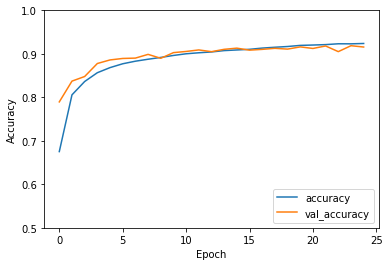

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig('/content/drive/My Drive/ckids/tf-model-depth/models/acc.png')

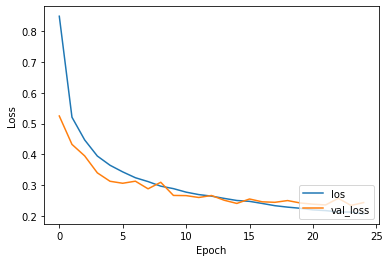

In [ ]:
plt.plot(history.history['loss'], label='los')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.savefig('/content/drive/My Drive/ckids/tf-model-depth/models/loss.png')

In [ ]:
#depth
model = models.Sequential()
model.add(layers.Conv2D(512, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:

tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)